# Receive Renovar API Data

## Constants and imports

### Imports

In [1]:
from SensorData import SensorData
from GetSensorDataService import GetSensorDataService
from SensorDataAnalysisService import SensorDataAnalysisService as sensor_analysis

/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Sensors IDs

In [2]:
TEMPERATURE_ID     =  130
PRESSURE_ID        =  131
ALPHA_CO_ID        =  132
ALPHA_NO2_ID       =  133
ALPHA_SO2_1_ID     =  134
ALPHA_OX_1_ID      =  135
ALPHA_OX_2_ID      =  136
ALPHA_SO2_2_ID     =  137
EXT_TEMPERATURE_ID =  138
EXT_HUMIDITY_ID    =  139
PM10_ID            =  140
PM25_ID            =  141
PM01_ID            =  142
OPC_TEMPERATURE_ID =  143
OPC_HUMIDITY_ID    =  144

### API Constants

In [3]:
HOST = "renovar.lcqar.ufsc.br"
PORT = 8080
GET_SAMPLES_BY_SENSOR = "/sample/sensor/all/"
HTTP_REQUEST_MAIN = 'http://' + HOST + ':' + str(PORT) + GET_SAMPLES_BY_SENSOR

# Alphasense PM10 Sensor Data

In [4]:
get_sensor_data_service = GetSensorDataService(HOST, PORT, GET_SAMPLES_BY_SENSOR)
sensor_data = get_sensor_data_service.get_data_from_file("data/raw-data-monit-fix-2022-2023-Diamante/OPC_PM10.CSV",
                                                         sensor_name='alpha_pm_10_conc')
sensor_data.head()

/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/data-pre-processing/GetSensorDataService.py:15: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['DateTime'] = (pd.to_datetime(df[date_time_col], infer_datetime_format=False, format='%d/%m/%Y/%H/%M/%S'))


,latitude,longitude,measuring,DateTime
0,-28.456899,-48.972999,-9999.99,2022-11-21 10:44:06
1,-28.456899,-48.972999,-9999.99,2022-11-21 10:59:51
2,-28.456899,-48.972999,-9999.99,2022-11-21 11:15:41
3,-28.456899,-48.972999,-9999.99,2022-11-21 11:31:25
4,-28.456899,-48.972999,-9999.99,2022-11-21 11:47:05


In [5]:
pm10_conc_data = SensorData(PM10_ID, sensor_name='alpha_pm_10_conc', lower_limit=0.0, upper_limit=20e6, 
                             t_90=1, t_90_value=20e6, sampling_period=15 * 60, 
                             get_service=get_sensor_data_service)

## Upload Data from File

In [6]:
pm10_conc_data.read_from_csv()
pm10_conc_data.web_dataframe.head()

/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/data-pre-processing/SensorData.py:130: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  self.web_dataframe['DateTime'] = (pd.to_datetime(df['DateTime'], infer_datetime_format=True))


,latitude,longitude,measuring,DateTime
0,-28.456899,-48.972999,-9999.99,2022-11-21 10:44:06
1,-28.456899,-48.972999,-9999.99,2022-11-21 10:59:51
2,-28.456899,-48.972999,-9999.99,2022-11-21 11:15:41
3,-28.456899,-48.972999,-9999.99,2022-11-21 11:31:25
4,-28.456899,-48.972999,-9999.99,2022-11-21 11:47:05


## Tag data

In [7]:
pm10_conc_data.tag_and_prepare_data()
pm10_conc_data.sensor_dataframe.head()

,latitude,longitude,measuring,Tag,Diff
DateTime,,,,,
2022-11-21 10:30:00,-28.456899,-48.972999,-9999.99,MISSING,NaN
2022-11-21 10:45:00,-28.456899,-48.972999,-9999.99,MISSING,0.0
2022-11-21 11:00:00,NaN,NaN,NaN,MISSING,NaN
2022-11-21 11:15:00,-28.456899,-48.972999,-9999.99,MISSING,NaN
2022-11-21 11:30:00,-28.456899,-48.972999,-9999.99,MISSING,0.0


### Data Tag contabilization

In [8]:
tags = ['MISSING','LTLL', 'GTUL', 'BADSPIKE', 'VALID']
data_contabilization = sensor_analysis.count_tags(tags, pm10_conc_data.sensor_dataframe)
data_contabilization

,#,%
MISSING,7383,50.773674
LTLL,2,0.013754
GTUL,0,0.0
BADSPIKE,0,0.0
VALID,7156,49.212571
TOTAL,14541,100.0


### Plot raw data

<Axes: xlabel='DateTime'>

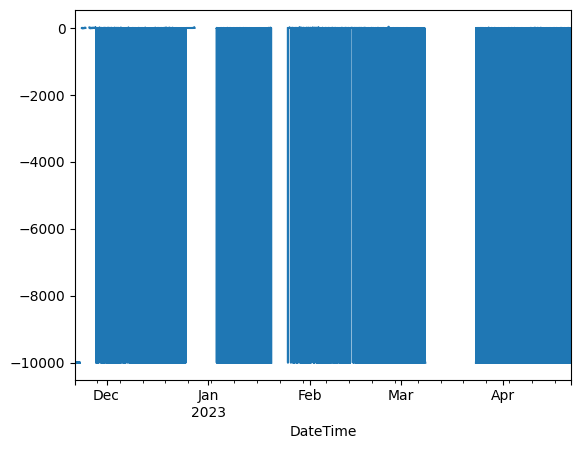

In [9]:
pm10_conc_data.sensor_dataframe['measuring'].plot()

### Plot Valid Data

<Axes: xlabel='DateTime'>

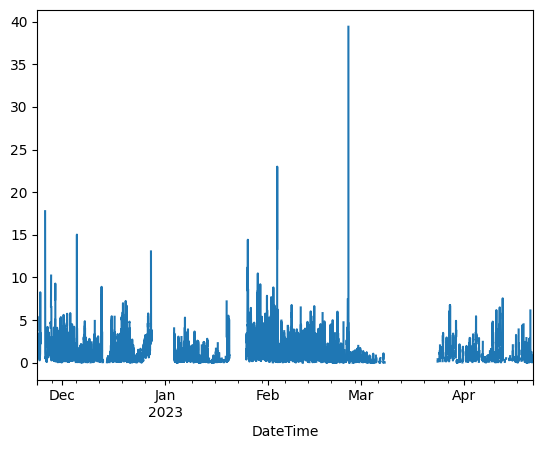

In [10]:
pm10_conc_data.sensor_dataframe[pm10_conc_data.sensor_dataframe['Tag'] == 'VALID']['measuring'].resample('15T').mean().plot()

### Plot raw derivatives

<Axes: xlabel='DateTime'>

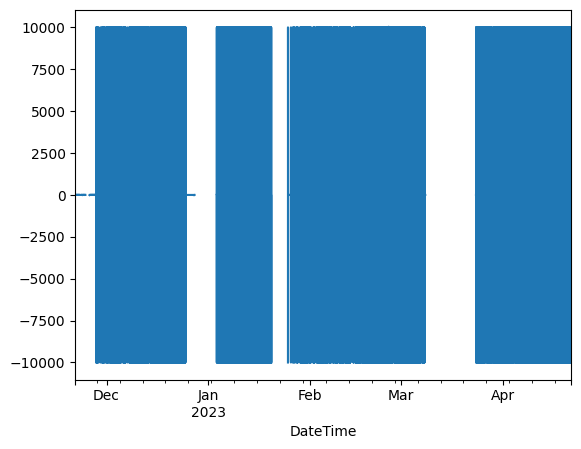

In [11]:
pm10_conc_data.sensor_dataframe['Diff'].resample('15T').mean().plot()

### Plot valid derivatives

<Axes: xlabel='DateTime'>

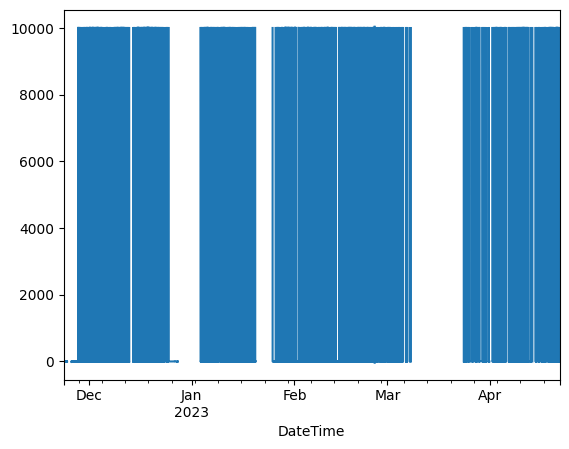

In [12]:
pm10_conc_data.valid_differential_series.resample('15T').mean().plot()

## Resampled data

In [13]:
pm10_conc_data.sensor_dataframe_1hr.head()

,latitude,longitude,measuring,Diff,Hour,Count,Std,% valid,Tag
DateTime,,,,,,,,,
2022-11-23 11:00:00,-28.456899,-48.972999,4.126667,-0.375000,11,3,1.189384,75.0,VALID
2022-11-23 12:00:00,-28.456899,-48.972999,2.580000,-0.345000,12,4,0.710446,100.0,VALID
2022-11-23 13:00:00,-28.456899,-48.972999,2.456667,-0.236667,13,3,1.259577,75.0,VALID
2022-11-23 14:00:00,-28.456899,-48.972999,1.027500,0.120000,14,4,0.183553,100.0,VALID
2022-11-23 15:00:00,-28.456899,-48.972999,1.467500,0.065000,15,4,0.072744,100.0,VALID


### Data contabilization

In [14]:
tags = ['LOWSAMPLES','VALID'] 
data_contabilization = sensor_analysis.count_tags(tags, pm10_conc_data.sensor_dataframe_1hr)
data_contabilization

,#,%
LOWSAMPLES,1985,55.354155
VALID,1601,44.645845
TOTAL,3586,100.0


### Plot raw hourly data

<Axes: xlabel='DateTime'>

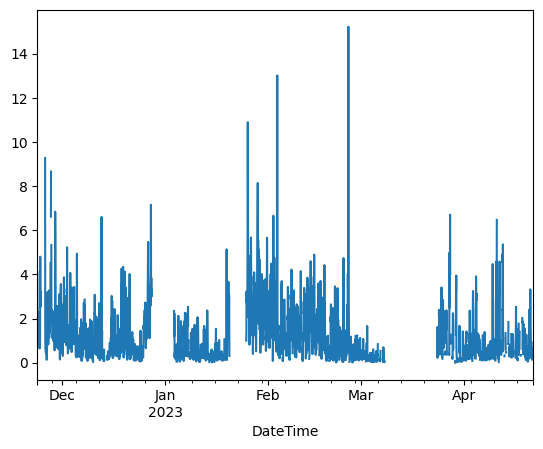

In [15]:
pm10_conc_data.sensor_dataframe_1hr['measuring'].plot()

### Plot valid hourly data

<Axes: xlabel='DateTime'>

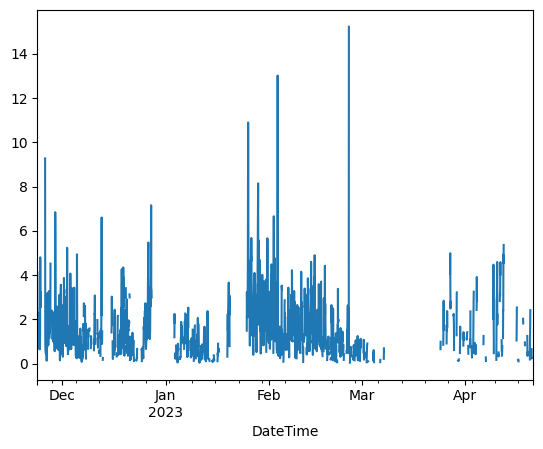

In [16]:
pm10_conc_data.sensor_dataframe_1hr[pm10_conc_data.sensor_dataframe_1hr['Tag'] == 'VALID']['measuring'].resample('H').mean().plot()

### Plot raw standard deviation

<Axes: xlabel='DateTime'>

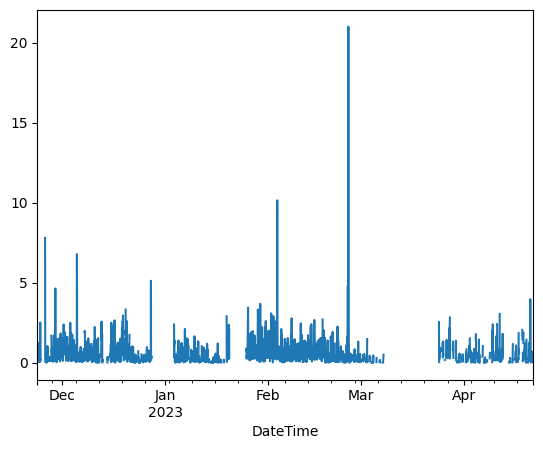

In [17]:
pm10_conc_data.sensor_dataframe_1hr['Std'].resample('H').mean().plot()

### Plot valid standard deviation

<Axes: xlabel='DateTime'>

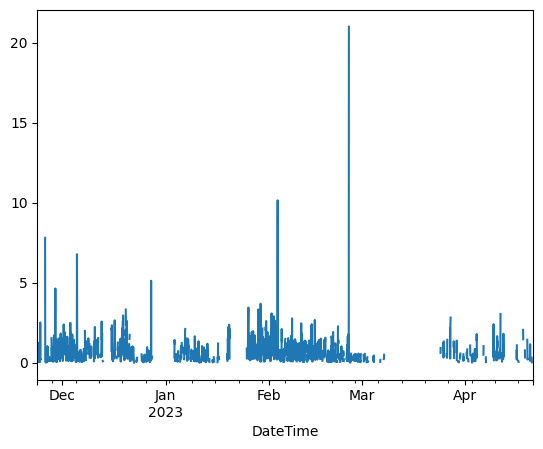

In [18]:
pm10_conc_data.sensor_dataframe_1hr[pm10_conc_data.sensor_dataframe_1hr['Tag'] == 'VALID']['Std'].resample('H').mean().plot()

## Calculate quantiles and tag data accordingly

### Calculate quantiles

In [19]:
pm10_conc_data.calculate_and_tag_quantiles()
pm10_conc_data.sensor_dataframe_1hr.head()

,latitude,longitude,measuring,Diff,Hour,Count,Std,% valid,Tag,GLOBAL_QTLE01,GLOBAL_QTLE99
DateTime,,,,,,,,,,,
2022-11-23 11:00:00,-28.456899,-48.972999,4.126667,-0.375000,11,3,1.189384,75.0,GTQTLE99,0.060000,4.126667
2022-11-23 12:00:00,-28.456899,-48.972999,2.580000,-0.345000,12,4,0.710446,100.0,VALID,0.120000,3.336667
2022-11-23 13:00:00,-28.456899,-48.972999,2.456667,-0.236667,13,3,1.259577,75.0,VALID,0.066667,6.660000
2022-11-23 14:00:00,-28.456899,-48.972999,1.027500,0.120000,14,4,0.183553,100.0,VALID,0.122500,8.665000
2022-11-23 15:00:00,-28.456899,-48.972999,1.467500,0.065000,15,4,0.072744,100.0,VALID,0.050000,5.662500


In [20]:
tags = ['LOWSAMPLES','VALID', 'LTQTLE01', 'GTQTLE99']
data_contabilization = sensor_analysis.count_tags(tags, pm10_conc_data.sensor_dataframe_1hr)
data_contabilization

,#,%
LOWSAMPLES,1985,55.354155
VALID,1553,43.307306
LTQTLE01,24,0.669269
GTQTLE99,24,0.669269
TOTAL,3586,100.0


## Process valid hourly data

In [21]:
valid_dataframe = (pm10_conc_data.sensor_dataframe_1hr[pm10_conc_data.sensor_dataframe_1hr['Tag'] == 'VALID']
                   .drop(columns=['Tag']).resample('H').mean())

### Plot mean vs. standard deviation for valid hourly data colored by valid percentage of valid samples

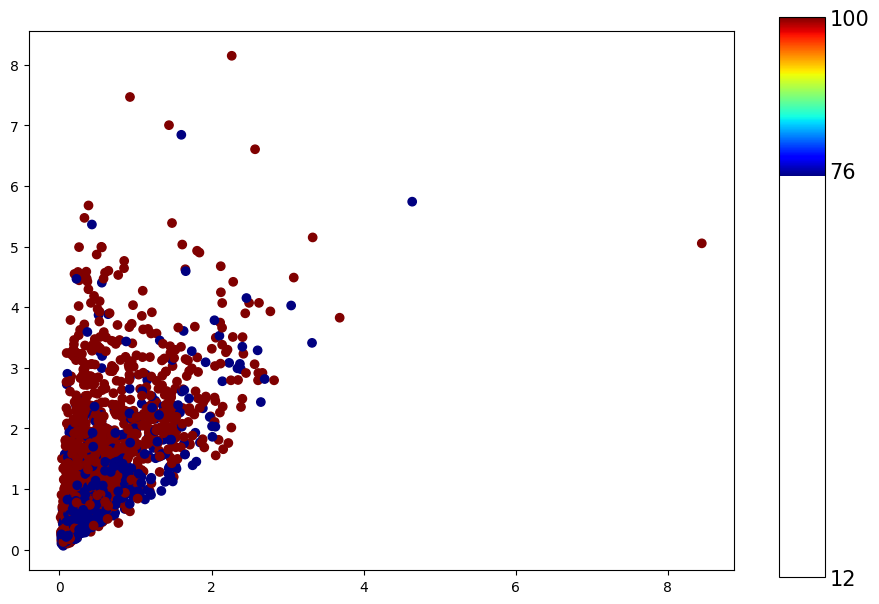

In [22]:
sensor_analysis.plot_mean_vs_std(valid_dataframe)

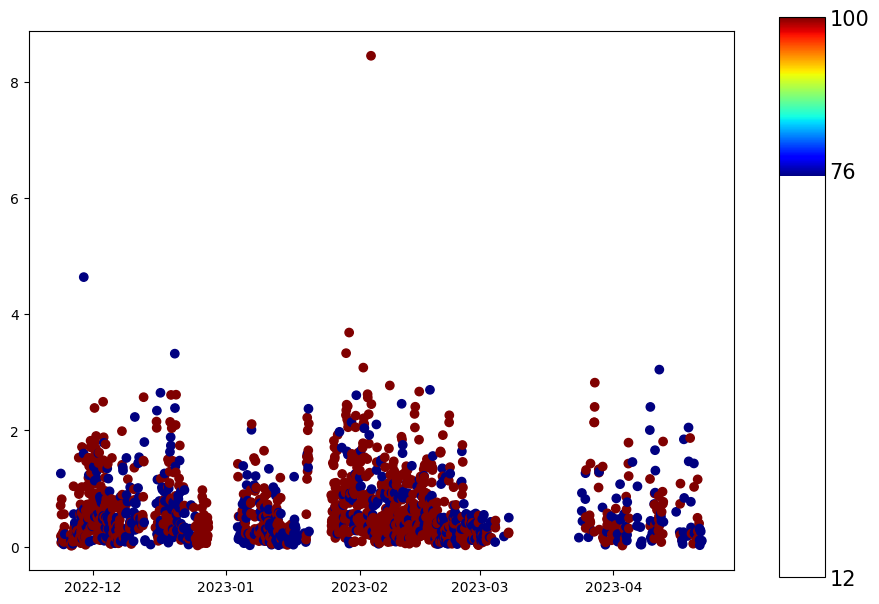

In [23]:
sensor_analysis.plot_std_in_time(valid_dataframe)

/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/data-pre-processing/SensorDataAnalysisService.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Hour'].astype('int64')


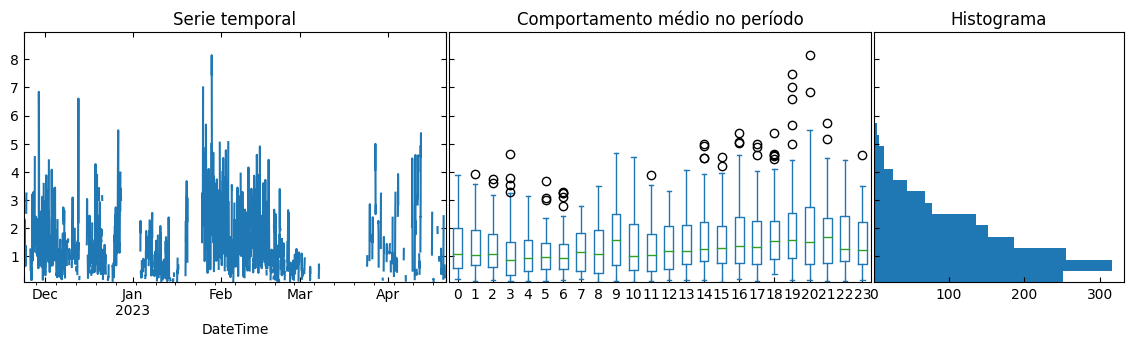

In [24]:
sensor_analysis.plot_box_hist(valid_dataframe, 20)

## Save Data

In [25]:
pm10_conc_data.save_to_csv()